<a href="https://colab.research.google.com/github/shanky-ux/PRODIGY_ML_01/blob/main/PRODIGY_ML_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# Locating the zip file
zip_path = '/content/data/archive.zip'
extract_to_path = '/content/data/'

# Extracting the new zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

In [ ]:
# Loading the customer data
customer_data_path = '/content/data/Mall_Customers.csv'
customer_data = pd.read_csv(customer_data_path)

In [ ]:
X = customer_data[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Determining the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

In [ ]:
# Plotting the elbow curve and determine the optimal number of clusters
import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
#according to my sepculations 4 clusters are the right amount of clusters

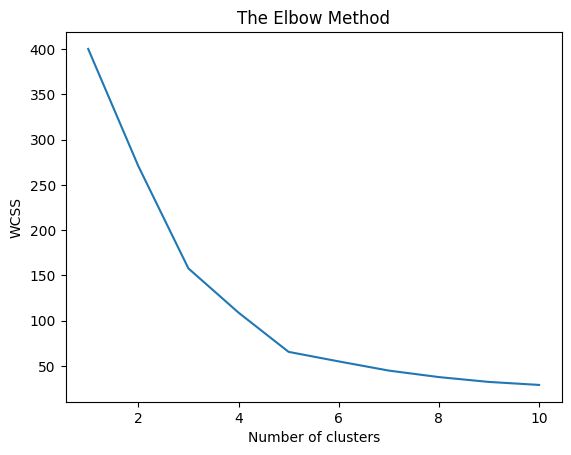

In [ ]:
# Applying K-Means clustering
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)

In [ ]:
# Analying the clusters
customer_data['cluster'] = y_kmeans
cluster_centers = kmeans.cluster_centers_
print('Cluster Centers:')
print(cluster_centers)

In [ ]:
Output:
Cluster Centers:
[[ 0.99158305  1.23950275]
 [-0.46948398  0.2437994 ]
 [ 1.00919971 -1.22553537]
 [-1.30751869 -1.13696536]]

In [ ]:
# Assigning meaningful labels to the clusters
cluster_labels = ['High Income, High Spending customers are:  ', 'High Income, Low Spending customers are :', 'Low Income , Low Spending customers are :  ', 'Low Income , High Spending customers are:  ']
customer_data['cluster_label'] = [cluster_labels[label] for label in customer_data['cluster']]

print(customer_data['cluster_label'].value_counts())

In [ ]:
Output:
cluster_label
High Income, Low Spending customers are :      100
High Income, High Spending customers are:       39
Low Income , Low Spending customers are :       38
Low Income , High Spending customers are:       23
Name: count, dtype: int64